Consider the following system: 
$$x(k)=Ax(k-1)+v(k-1) \\ 
z(k)=Hx(k)+w(k) \\ 
A=\begin{bmatrix} 0.8 & 0.6 \\ -0.6 & 0.8 \end{bmatrix}, H=\begin{bmatrix} 1 & 0 \end{bmatrix}, v(k)\sim\mathcal{N}(0,I), w(k)\sim\mathcal{N}(0,I), x(0)\sim\mathcal{N}\left(0,\begin{bmatrix} 3 & 0 \\ 0 & 1 \end{bmatrix}\right)$$  
and $x(0), \{v(\cdot)\}, \{w(\cdot)\}$ are independent. 
Define the estimation error $e(k):=x(k)-\hat{x}(k)$, where $\hat{x}(k)$ is the Kalman filter estimate of the state $x(k)$. 

We want to implement a simulation of the system and a Kalman filter that produces and estimate $\hat{x}(k)$. Execute this 10,000 times and plot a histogram of the resulting values for $e(10)$ (two histograms, one for each component of $e(10)$). 

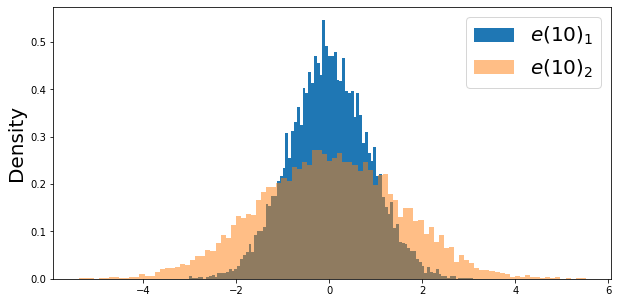

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement
A = np.array([[0.8, 0.6], 
              [-0.6, 0.8]])
H = np.array([[1, 0]])
Sigma_vv = np.eye(2)
Sigma_ww = np.eye(1)
P0 = np.array([[3, 0],
                [0, 1]])
mu0 = np.zeros((2, 1))
N = 10000
K = 10
n = 2
m = 1

# Simulation
x0 = np.random.normal(loc = np.zeros(n), scale = np.sqrt(np.diag(P0)), size = (N, n))
x = np.empty((K + 1, N, n, 1))
x[0] = x0.reshape(N, n, 1)
for k in range(K):
    v = np.random.normal(loc = np.zeros(n), scale = np.sqrt(np.diag(Sigma_vv)), size = (N, n))
    x[k + 1] = A @ x[k] + v.reshape(N, n, 1)
    
# Kalman Filter
Pm = np.empty((K + 1, n, n))
xm = np.empty((K + 1, N, n, 1))
e = np.empty((K + 1, N, n, 1))

Pm[0] = P0
xm[0] = np.expand_dims(mu0, axis = 0).repeat(N, axis = 0)
e[0] = x[0] - xm[0]

for k in range(K): 
    xp = A @ xm[k]
    Pp = A @ Pm[k] @ A.T + Sigma_vv
    w = np.random.normal(loc = np.zeros(m), scale = np.sqrt(np.diag(Sigma_ww)), size = (N, m))
    z = H @ x[k + 1] + w.reshape(N, m, 1)
    
    xm[k + 1] = xp + Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + Sigma_ww) @ (z - H @ xp)
    Pm[k + 1] = Pp - Pp @ H.T @ np.linalg.inv(H @ Pp @ H.T + Sigma_ww) @ H @ Pp
    e[k + 1] = x[k + 1] - xm[k + 1]
    
# Plot histograms of each components in e(10)
plt.figure(figsize = (10, 5))
plt.hist(e[10, :, 0], bins = 100, density = True, label = r'$e(10)_1$')
plt.hist(e[10, :, 1], bins = 100, alpha = 0.5, density = True, label = r'$e(10)_2$')
plt.legend(fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()